In [10]:
import time
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
path_data = Path().resolve().parent / "testdata" / "CarPrice.csv"
df = pd.read_csv(path_data)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


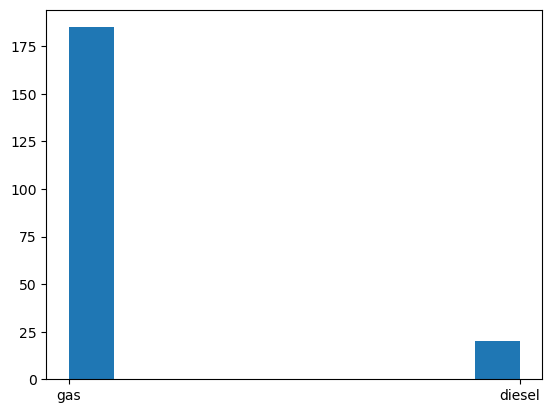

In [12]:
df.drop(["car_ID","symboling","CarName","aspiration","doornumber","fuelsystem","enginelocation","enginetype"],axis=1,inplace=True)
plt.hist(df["fueltype"])
plt.show()

In [13]:
dummy1 = pd.get_dummies(df['fueltype'],drop_first=True)
dummy2 = pd.get_dummies(df['carbody'],drop_first=True)
dummy3 = pd.get_dummies(df['drivewheel'],drop_first=True)
dummy4 = pd.get_dummies(df['cylindernumber'],drop_first=True)
df.drop(['fueltype','carbody',"drivewheel","cylindernumber"],axis=1,inplace=True)

In [14]:
df = pd.concat([df,dummy1,dummy2,dummy3,dummy4],axis=1)
df.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,sedan,wagon,fwd,rwd,five,four,six,three,twelve,two
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,False,False,False,True,False,True,False,False,False,False
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,False,False,False,True,False,True,False,False,False,False
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,False,False,False,True,False,False,True,False,False,False
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,True,False,True,False,False,True,False,False,False,False
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,True,False,False,False,True,False,False,False,False,False


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(["price"],axis=1), 
                                                    df['price'], test_size=0.30, 
                                                    random_state=111)

In [17]:
from sklearn.ensemble import RandomForestRegressor
max_epoch = 100
model = [0]*max_epoch
for i in range(max_epoch):
    print(i)
    model[i] = RandomForestRegressor(n_estimators = i+1)
    model[i].fit(X_train, y_train)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [18]:
max = 0
_index = -1
for i in range(max_epoch):
    print("Fit:",model[i].score(X_train,y_train),end=" - ")
    print("Score:",model[i].score(X_test,y_test))
    if max < model[i].score(X_test,y_test):
        _index = 
        
    score[i] = model[i].score(X_test,y_test)
print(max

Fit: 0.8965298158551834 - Score: 0.616543690790868
Fit: 0.9694253611784255 - Score: 0.9087243456573639
Fit: 0.969966113677349 - Score: 0.8801843683325802
Fit: 0.9788169160426217 - Score: 0.8883716963859737
Fit: 0.961899528537063 - Score: 0.8926421892536593
Fit: 0.9573434607067315 - Score: 0.8830968249218422
Fit: 0.9744738537266039 - Score: 0.9037517554536569
Fit: 0.9854737913182816 - Score: 0.9180344423163576
Fit: 0.9718233578717511 - Score: 0.9021900275593765
Fit: 0.9841926758265802 - Score: 0.9104370356980487
Fit: 0.9889419536624308 - Score: 0.9256885082294204
Fit: 0.9812385718618011 - Score: 0.9158452002952083
Fit: 0.9843772868335416 - Score: 0.9175828476453322
Fit: 0.9802914560532564 - Score: 0.9281335048321976
Fit: 0.9811741503611715 - Score: 0.9190299316934053
Fit: 0.9820817355950472 - Score: 0.9177401501345104
Fit: 0.9865075123684293 - Score: 0.9229205990302608
Fit: 0.9861827113678897 - Score: 0.9333385078782929
Fit: 0.9823030288034076 - Score: 0.9275052035439874
Fit: 0.98405504